In [27]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [35]:
folder = Path('./params/N8')
#for f in folder.iterdir():
#    print(f.name.split('C')[-1].rstrip('.dat'))

In [29]:
plot_folder = "plots/data_distribution/N8/"

In [30]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = f.name.split('C')[-1].rstrip('.dat')
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.98*mx
    df_seg = df[(df['inequality']>mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])
    #print(df_seg.head())

    mn = 0.02*mx
    df_alt = df[(df['inequality']<mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.48)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])
    #print(df_alt.head())

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6010/1556323531.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,c,%seg,%alt,eff,ineq,eff_er,ineq_er
0,0.0,0.028286,0.000000,0.291042,0.346242,0.141122,0.111061
6,0.01,0.000000,0.000000,0.436264,0.300200,0.040007,0.087789
1,0.05,0.000000,0.001664,0.422688,0.261423,0.042322,0.087052
3,0.08,0.000000,0.004992,0.413556,0.238836,0.042201,0.082692
9,0.1,0.000000,0.001664,0.401268,0.216279,0.049319,0.078698


In [31]:
#df_c['c'].iloc[df_c['eff'].argmax()]

In [32]:
df_c['c']

0     0.0
6    0.01
1    0.05
3    0.08
9     0.1
7     0.3
4     0.5
2     0.7
5     1.0
8     2.0
Name: c, dtype: object

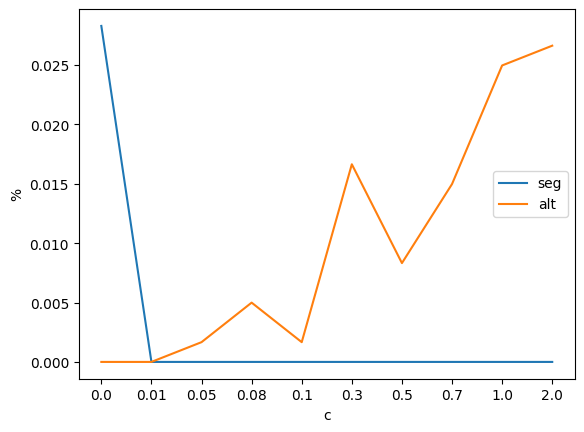

In [33]:
ax = sns.lineplot(x='c',y='%seg',data=df_c,label='seg')
ax.set_ylabel('%')
sns.lineplot(x='c',y='%alt',data=df_c,label='alt')
plt.savefig(plot_folder+'seg_alt_percent.png')

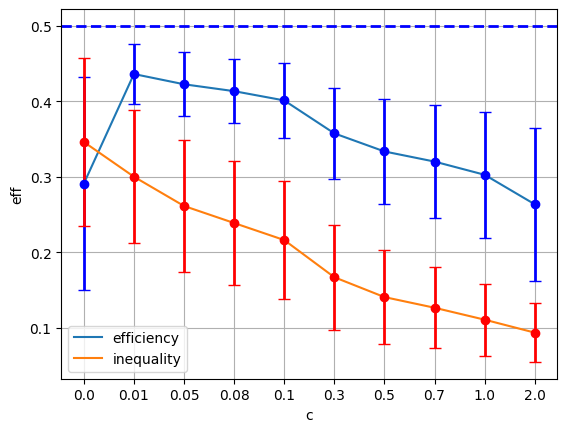

In [34]:
ax = sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
ax.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='red', ecolor='r', elinewidth=2, capsize=4)
plt.grid()
plt.savefig(plot_folder+'eff_ineq_vs_C.png')